In [31]:
from sqlalchemy import create_engine
engine = create_engine('postgresql://localhost:5432/employee')
connection = engine.connect()

In [32]:
import pandas as pd 
from matplotlib import pyplot as plt

In [33]:
df_salary=pd.read_sql("select * from employee.salaries",connection)

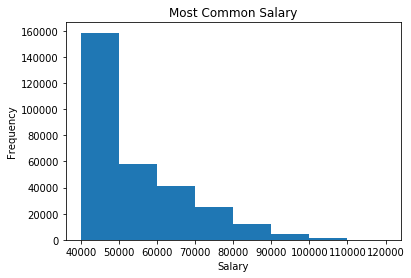

In [44]:
plt.hist(df_salary['salary'], bins=list(range(40000, 129999, 10000)))
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.title('Most Common Salary')
plt.show()

In [51]:
title_sql='''select
  t.title,
    round(cast(avg(s.salary) as numeric),2) as salary
from employee.employees e,employee.salaries s,employee.titles t
where e.emp_no=s.emp_no and e.emp_title_id=t.title_id
group by t.title'''
df_title=pd.read_sql(title_sql,connection)

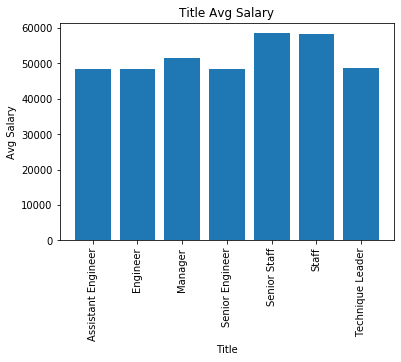

In [60]:
plt.bar(df_title['title'],df_title['salary'])
plt.xticks(rotation=90)
plt.xlabel('Title')
plt.ylabel('Avg Salary')
plt.title('Title Avg Salary')
plt.show()